In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image

(100, 64, 64, 3)
(64, 64, 3)
[[[0.18431373 0.10980392 0.04705882]
  [0.18431373 0.10980392 0.04705882]
  [0.09411765 0.05490196 0.01568628]
  ...
  [0.06666667 0.10980392 0.06666667]
  [0.04705882 0.07843138 0.03921569]
  [0.07450981 0.10588235 0.06666667]]

 [[0.24313726 0.16862746 0.10588235]
  [0.18431373 0.10980392 0.04705882]
  [0.09411765 0.05490196 0.01568628]
  ...
  [0.05882353 0.10196079 0.05882353]
  [0.07450981 0.10588235 0.06666667]
  [0.07843138 0.10980392 0.07058824]]

 [[0.14901961 0.08627451 0.01960784]
  [0.23529412 0.17254902 0.10588235]
  [0.09411765 0.04705882 0.        ]
  ...
  [0.08627451 0.12941177 0.08627451]
  [0.09019608 0.13333334 0.09019608]
  [0.07450981 0.11764706 0.07450981]]

 ...

 [[0.14509805 0.20392157 0.09411765]
  [0.3019608  0.36078432 0.2509804 ]
  [0.2509804  0.3137255  0.19215687]
  ...
  [0.35686275 0.2509804  0.18039216]
  [0.4627451  0.32156864 0.20784314]
  [0.54901963 0.40784314 0.29411766]]

 [[0.25490198 0.3137255  0.20392157]
  [0.207

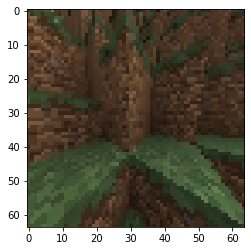

In [432]:
path = os.path.join("C:\\Users\\Robin\\Desktop\\deep_learning")
file = np.load(path+"\\processed_data\\v3_absolute_grape_changeling-12_2293-4124NDTRAIN.npy", allow_pickle=True)[1]
hard_test = np.array(file[-1792:][150]).astype(np.float32)/255.
file = np.array(file[-1792:][:100]).astype(np.uint8)
print(file.shape)
#for i in range(len(file)):
    #processed = np.append(np.array(Image.fromarray(file[i], "RGB").convert("L")), processed)
processed = file.reshape(100, 64, 64, 3)
test = processed[-1]
test = test.reshape(-1,64,64,3)
processed = processed[:-1]
test = test.reshape(-1,64,64,3).astype(np.float32)/255.
processed = processed.astype(np.float32)/255.
print(processed[0].shape)
plt.imshow(processed[-1])
print(processed[0])

In [433]:
cnn_encoder = keras.models.Sequential([
    #keras.layers.Flatten(),
    #keras.layers.Dense(100, activation="relu"),
    #keras.layers.Dense(64*64*3),
   # keras.layers.Dropout(0.8),
    keras.layers.Reshape([64,64,3]),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="tanh", input_shape=[64,64,3]),
    keras.layers.AvgPool2D(pool_size=2),
    keras.layers.Conv2D(128, kernel_size=2, padding="same", activation="tanh"),
    keras.layers.AvgPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(100),
    keras.layers.Dense(50)
])

cnn_decoder = keras.models.Sequential([
    #keras.layers.Conv2DTranspose(32, kernel_size=3, strides=1, padding="same", activation="tanh", input_shape=[16,16,128]),
    #keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="same", activation="tanh"),
    #keras.layers.Conv2DTranspose(3, kernel_size=5, strides=2, padding="same", activation="tanh"),
    #keras.layers.Flatten(),
    keras.layers.Dense(100, activation="tanh", input_shape=[50]),
    keras.layers.Dense(64*64*3, activation="sigmoid"),
    keras.layers.Dropout(0.4),
    keras.layers.Reshape([64,64,3])
])

cnn_autoencoder = keras.models.Sequential([cnn_encoder, cnn_decoder])  

#for layer in cnn_encoder.layers:
    #print(layer.get_output_at(0).get_shape().as_list())
    
#for layer in cnn_decoder.layers:
    #print(layer.get_output_at(0).get_shape().as_list())

cnn_autoencoder.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.5))
history = cnn_autoencoder.fit(processed, processed, epochs=100, validation_data=(test, test))
cnn_autoencoder.summary()

Epoch 1/100
4/4 [==============================] - 2s 494ms/step - loss: 2.4171 - val_loss: 0.6929
Epoch 2/100
4/4 [==============================] - 2s 454ms/step - loss: 2.4216 - val_loss: 0.6924
Epoch 3/100
4/4 [==============================] - 2s 379ms/step - loss: 2.4205 - val_loss: 0.6911
Epoch 4/100
4/4 [==============================] - 1s 240ms/step - loss: 2.4127 - val_loss: 0.6869
Epoch 5/100
4/4 [==============================] - 1s 229ms/step - loss: 2.3964 - val_loss: 0.6786
Epoch 6/100
4/4 [==============================] - 1s 210ms/step - loss: 2.3647 - val_loss: 0.6686
Epoch 7/100
4/4 [==============================] - 1s 215ms/step - loss: 2.3359 - val_loss: 0.6583
Epoch 8/100
4/4 [==============================] - 1s 196ms/step - loss: 2.3046 - val_loss: 0.6490
Epoch 9/100
4/4 [==============================] - 1s 201ms/step - loss: 2.2755 - val_loss: 0.6407
Epoch 10/100
4/4 [==============================] - 1s 198ms/step - loss: 2.2525 - val_loss: 0.6332
Epoch 11/

4/4 [==============================] - 1s 228ms/step - loss: 1.9654 - val_loss: 0.5217
Epoch 84/100
4/4 [==============================] - 1s 230ms/step - loss: 1.9607 - val_loss: 0.5215
Epoch 85/100
4/4 [==============================] - 1s 235ms/step - loss: 1.9596 - val_loss: 0.5213
Epoch 86/100
4/4 [==============================] - 1s 220ms/step - loss: 1.9614 - val_loss: 0.5211
Epoch 87/100
4/4 [==============================] - 1s 203ms/step - loss: 1.9588 - val_loss: 0.5210
Epoch 88/100
4/4 [==============================] - 1s 200ms/step - loss: 1.9537 - val_loss: 0.5209
Epoch 89/100
4/4 [==============================] - 1s 202ms/step - loss: 1.9574 - val_loss: 0.5208
Epoch 90/100
4/4 [==============================] - 1s 259ms/step - loss: 1.9575 - val_loss: 0.5206
Epoch 91/100
4/4 [==============================] - 1s 234ms/step - loss: 1.9551 - val_loss: 0.5205
Epoch 92/100
4/4 [==============================] - 1s 221ms/step - loss: 1.9532 - val_loss: 0.5204
Epoch 93/100


Original image:


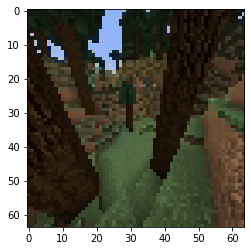

AI vision:


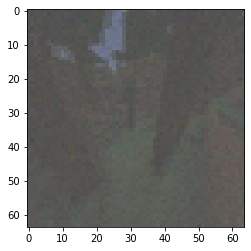

In [431]:
image = cnn_autoencoder.predict(processed[-1].reshape(-1,64,64,3))
#Original image
print("Original image:")
plt.imshow(test.reshape(64,64,3))
plt.show()
#AI autoencoder vision
print("AI vision:")
plt.imshow(image.reshape(64,64,3))
plt.show()

float32
<PrefetchDataset shapes: (1, 64, 64, 3), types: tf.float32>
0
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


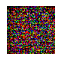

1
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


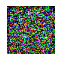

2
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


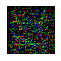

3
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


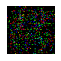

4
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


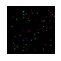

5
(2, 64, 64, 3)
(2, 1)


KeyboardInterrupt: 

In [354]:
cnn_codings = 200

cnn_gen = keras.models.Sequential([
    keras.layers.Dense(100, input_shape=[cnn_codings]),
    keras.layers.Dense(30),
    keras.layers.Dense(16*16*128),
    keras.layers.Reshape([16,16,128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, kernel_size=2, strides=1, padding="same", activation="tanh"),
    keras.layers.Conv2D(128, kernel_size=5, strides=1, padding="same", activation="tanh"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64, kernel_size=3, strides=2, padding="same",
                                activation="tanh"),
    keras.layers.Conv2DTranspose(64, kernel_size=2, strides=1, padding="same",
                                activation="tanh"),
    keras.layers.Conv2DTranspose(3, kernel_size=2, strides=2, padding="same",
                                 activation=keras.layers.LeakyReLU(0.2))
])

cnn_dis = keras.models.Sequential([
    keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="same",
                       activation=keras.layers.LeakyReLU(0.2), 
                       input_shape=[64,64,3]),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="same",
                       activation=keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
])

#for layer in cnn_gen.layers:
    #print(layer.get_output_at(0).get_shape().as_list())
#for layer in cnn_dis.layers:
    #print(layer.get_output_at(0).get_shape().as_list())

cnn_gan = keras.models.Sequential([cnn_gen, cnn_dis])
cnn_dis.compile(loss="binary_crossentropy", optimizer="rmsprop")
cnn_dis.trainable = False
cnn_gan.compile(loss="binary_crossentropy", optimizer="rmsprop")
batch_size = 1
processed = np.array(processed).reshape(-1,64,64,3)
dataset = tf.data.Dataset.from_tensor_slices(processed)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)
print(processed.dtype)
print(dataset)

def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

def train_gan(gan, dataset, batch_size, codings_size, n_epochs=200):
    cnn_gen, cnn_dis = cnn_gan.layers
    for epoch in range(n_epochs):
        print(epoch)
        for X_batch in dataset:
            
            #training the discriminator
            X_batch = tf.cast(X_batch, tf.float32)
            noise = tf.random.normal(shape=[batch_size,codings_size])
            generated_images = cnn_gen(noise)*255
            
            #print(generated_images[0][0][0])
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            print(X_fake_and_real.shape)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            print(y1.shape)
            cnn_dis.trainable = True
            cnn_dis.train_on_batch(X_fake_and_real, y1)
            
            #training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            cnn_dis.trainable = False
            cnn_gan.train_on_batch(noise, y2)
        plot_multiple_images(generated_images, 8)                    
        plt.show()
        
train_gan(cnn_gan, dataset, batch_size, cnn_codings)

Original image:


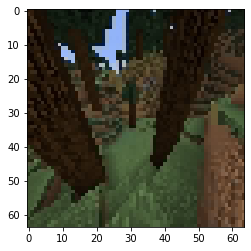

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


AI vision:


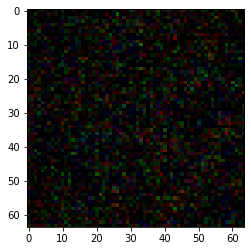

In [350]:
#GAN tester
noise = tf.random.normal(shape=[batch_size, cnn_codings])
gan_img = cnn_gen.predict(noise)

print("Original image:")
plt.imshow(processed[0].reshape(64,64,3))
plt.show()
#AI autoencoder vision
print("AI vision:")
plt.imshow(gan_img.reshape(64,64,3))
plt.show()